This notebooks imports and plots the cross section models exiting in the code.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prince_cr import cross_sections

# Importing the cross section models and plotting them

### Peanut Model

Peanut is a tabulated model. It is chosen as default, when making an instance of TabulatedCrossSection.

In [4]:
cs_peanut = cross_sections.TabulatedCrossSection('PEANUT_IAS')

In [5]:
cs_talys = cross_sections.TabulatedCrossSection('CRP2_TALYS')

In [6]:
max(cs_peanut.nonel_idcs)

5626

### Sophia Superposition Model

In [7]:
cs_sophia = cross_sections.SophiaSuperposition()

### Empirical Model

**This interface to this model is in transition between a custom code base and an official package.** Photomeson model based on experimental data and empirical relations.

In [9]:
# cs_em = cross_sections.EmpiricalModel()

In [10]:
# r1 = cs_em.nonel(100)
# r1 = cs_em.nonel(5626)
# r1 = cs_em.incl(1407, 100)
# r1 = cs_em.incl(1407, 4)
# r1 = cs_em.incl_diff(1407, 100)
# r1 = cs_em.incl_diff(1407, 100)

In [11]:
# for mo, da in cs_peanut.incl_idcs:
#     if mo < da:
#         print(mo, da)
# print('------------------')
# for mo, da in cs_peanut._incl_tab:
#     if mo < da:
#         print(mo, da)

Model based on empirical relations and experimental data. More realistic than the Superposition Model.

In [12]:
# cs_empiric = cross_sections.EmpiricalModel()

## Plots

### Sophia Model

This simple model just assumes a superposition of the nucleons in each nucleus.

So the crosssection scaled by $ 1 / A $ should look almost the same in all cases.

(The small difference is due to the different crossections for protons and neutrons.)

**This model is only valid above the pion prod. treshold $\approx 2 \cdot 10^{-1} \mathrm{GeV}$**

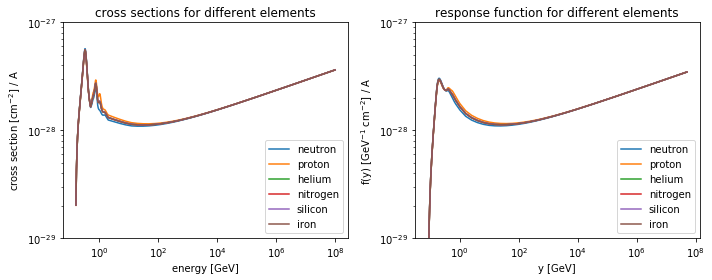

In [13]:
# non elastic cross-section for different elements
# cross section at high energy should scale only with mass number A
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,4))

plt.sca(ax1)
eplot = np.logspace(-1,3,200)
plt.loglog(*cs_sophia.nonel_scale(100), label = 'neutron')
plt.loglog(*cs_sophia.nonel_scale(101), label = 'proton')
plt.loglog(*cs_sophia.nonel_scale(402), label = 'helium')
plt.loglog(*cs_sophia.nonel_scale(1407), label = 'nitrogen')
plt.loglog(*cs_sophia.nonel_scale(2814), label = 'silicon')
plt.loglog(*cs_sophia.nonel_scale(5626), label = 'iron')


plt.title('cross sections for different elements')
plt.xlabel('energy [GeV]')
plt.ylabel('cross section [cm$^{-2}$] / A')
plt.ylim(1e-29,1e-27)
plt.legend()

plt.sca(ax2)
plt.loglog(*cs_sophia.resp.get_channel_scale(100), label = 'neutron')
plt.loglog(*cs_sophia.resp.get_channel_scale(101), label = 'proton')
plt.loglog(*cs_sophia.resp.get_channel_scale(402), label = 'helium')
plt.loglog(*cs_sophia.resp.get_channel_scale(1407), label = 'nitrogen')
plt.loglog(*cs_sophia.resp.get_channel_scale(2814), label = 'silicon')
plt.loglog(*cs_sophia.resp.get_channel_scale(5626), label = 'iron')

plt.title('response function for different elements')
plt.xlabel('y [GeV]')
plt.ylabel('f(y) [GeV$^{-1}$ cm$^{-2}$] / A')
plt.ylim(1e-29,1e-27)
plt.legend()

plt.tight_layout()

### Empirical Model

This uses a universal function for the crosssection scaled by $ 1 / A $ in the resonances region, and a superposition beyond that.

The mass scaling of the cross section gradually turns from $A$ to $A^{2/3}$ with increasing energy leading to a mass difference between the cross section of different nuclei divided by $A$.

**This model is only valid above the pion prod. treshold $\approx 2 \cdot 10^{-1} \mathrm{GeV}$**

In [15]:
# # non elastic cross-section for different elements
# # cross section at high energy should scale only with mass number A
# fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,4))

# plt.sca(ax1)
# eplot = np.logspace(-1,3,200)
# plt.loglog(*cs_empiric.nonel_scale(100), label = 'neutron')
# plt.loglog(*cs_empiric.nonel_scale(101), label = 'proton')
# plt.loglog(*cs_empiric.nonel_scale(402), label = 'helium')
# plt.loglog(*cs_empiric.nonel_scale(1407), label = 'nitrogen')
# plt.loglog(*cs_empiric.nonel_scale(2814), label = 'silicon')
# plt.loglog(*cs_empiric.nonel_scale(5626), label = 'iron')


# plt.title('cross sections for different elements')
# plt.xlabel('energy [GeV]')
# plt.ylabel('cross section [cm$^{-2}$] / A')
# plt.ylim(1e-29,1e-27)
# plt.legend()

# plt.sca(ax2)
# plt.loglog(*cs_empiric.resp.get_channel_scale(100), label = 'neutron')
# plt.loglog(*cs_empiric.resp.get_channel_scale(101), label = 'proton')
# plt.loglog(*cs_empiric.resp.get_channel_scale(402), label = 'helium')
# plt.loglog(*cs_empiric.resp.get_channel_scale(1407), label = 'nitrogen')
# plt.loglog(*cs_empiric.resp.get_channel_scale(2814), label = 'silicon')
# plt.loglog(*cs_empiric.resp.get_channel_scale(5626), label = 'iron')

# plt.title('response function for different elements')
# plt.xlabel('y [GeV]')
# plt.ylabel('f(y) [GeV$^{-1}$ cm$^{-2}$] / A')
# plt.ylim(1e-29,1e-27)
# plt.legend()

# plt.tight_layout()

### Peanut Model

The tabulated peanut model has realistic cross section for photodisintegration.
This process dominates below $10^{-1} \mathrm{GeV}$. Above that the photomeson crosssection has a universal curve for nuclei, which is due to smearing of the nucleons due to fermi motion. (it is therefore more peaked in the proton case.)

The data does not extend above $ 1 \mathrm{GeV}$



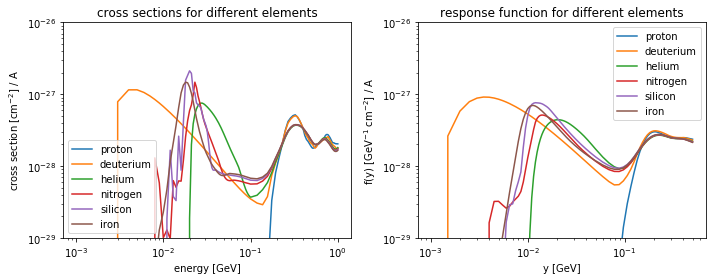

In [16]:
# non elastic cross-section for different elements
# cross section at high energy should scale only with mass number A
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,4))

plt.sca(ax1)
eplot = np.logspace(-1,3,200)
plt.loglog(*cs_peanut.nonel_scale(101), label = 'proton')
plt.loglog(*cs_peanut.nonel_scale(201), label = 'deuterium')
plt.loglog(*cs_peanut.nonel_scale(402), label = 'helium')
plt.loglog(*cs_peanut.nonel_scale(1407), label = 'nitrogen')
plt.loglog(*cs_peanut.nonel_scale(2814), label = 'silicon')
plt.loglog(*cs_peanut.nonel_scale(5626), label = 'iron')


plt.title('cross sections for different elements')
plt.xlabel('energy [GeV]')
plt.ylabel('cross section [cm$^{-2}$] / A')
plt.ylim(1e-29,1e-26)
plt.legend()

plt.sca(ax2)
plt.loglog(*cs_peanut.resp.get_channel_scale(101), label = 'proton')
plt.loglog(*cs_peanut.resp.get_channel_scale(201), label = 'deuterium')
plt.loglog(*cs_peanut.resp.get_channel_scale(402), label = 'helium')
plt.loglog(*cs_peanut.resp.get_channel_scale(1407), label = 'nitrogen')
plt.loglog(*cs_peanut.resp.get_channel_scale(2814), label = 'silicon')
plt.loglog(*cs_peanut.resp.get_channel_scale(5626), label = 'iron')

plt.title('response function for different elements')
plt.xlabel('y [GeV]')
plt.ylabel('f(y) [GeV$^{-1}$ cm$^{-2}$] / A')
plt.ylim(1e-29,1e-26)
plt.legend()

plt.tight_layout()

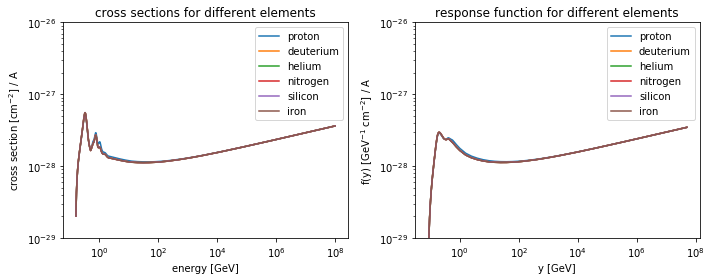

In [17]:
# non elastic cross-section for different elements
# cross section at high energy should scale only with mass number A
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,4))

plt.sca(ax1)
eplot = np.logspace(-1,3,200)
plt.loglog(*cs_sophia.nonel_scale(101), label = 'proton')
plt.loglog(*cs_sophia.nonel_scale(201), label = 'deuterium')
plt.loglog(*cs_sophia.nonel_scale(402), label = 'helium')
plt.loglog(*cs_sophia.nonel_scale(1407), label = 'nitrogen')
plt.loglog(*cs_sophia.nonel_scale(2814), label = 'silicon')
plt.loglog(*cs_sophia.nonel_scale(5626), label = 'iron')


plt.title('cross sections for different elements')
plt.xlabel('energy [GeV]')
plt.ylabel('cross section [cm$^{-2}$] / A')
plt.ylim(1e-29,1e-26)
plt.legend()

plt.sca(ax2)
plt.loglog(*cs_sophia.resp.get_channel_scale(101), label = 'proton')
plt.loglog(*cs_sophia.resp.get_channel_scale(201), label = 'deuterium')
plt.loglog(*cs_sophia.resp.get_channel_scale(402), label = 'helium')
plt.loglog(*cs_sophia.resp.get_channel_scale(1407), label = 'nitrogen')
plt.loglog(*cs_sophia.resp.get_channel_scale(2814), label = 'silicon')
plt.loglog(*cs_sophia.resp.get_channel_scale(5626), label = 'iron')

plt.title('response function for different elements')
plt.xlabel('y [GeV]')
plt.ylabel('f(y) [GeV$^{-1}$ cm$^{-2}$] / A')
plt.ylim(1e-29,1e-26)
plt.legend()

plt.tight_layout()

### Combining two models

Combining the cross section works by giving a list of models and their thresholds to the CompositeCrossSection class.

There should of course be no difference to the individual models in their range. (Thought the response function differs slightly, as it is averaged over all lover energies.)

In [18]:
%%time
cs_combined = cross_sections.CompositeCrossSection([(0., cross_sections.TabulatedCrossSection, ('CRP2_TALYS',)),
                                           (0.14, cross_sections.SophiaSuperposition, ())])

CompositeCrossSection::_join_models(): Attempt to join 2 models.
Wall time: 20.2 s


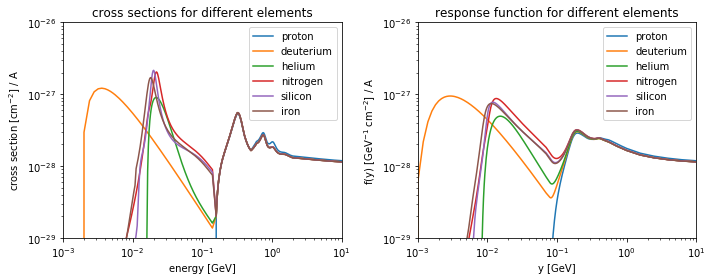

In [19]:
# non elastic cross-section for different elements
# cross section at high energy should scale only with mass number A
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,4))

plt.sca(ax1)
eplot = np.logspace(-1,3,200)
plt.loglog(*cs_combined.nonel_scale(101), label = 'proton')
plt.loglog(*cs_combined.nonel_scale(201), label = 'deuterium')
plt.loglog(*cs_combined.nonel_scale(402), label = 'helium')
plt.loglog(*cs_combined.nonel_scale(1407), label = 'nitrogen')
plt.loglog(*cs_combined.nonel_scale(2814), label = 'silicon')
plt.loglog(*cs_combined.nonel_scale(5626), label = 'iron')


plt.title('cross sections for different elements')
plt.xlabel('energy [GeV]')
plt.ylabel('cross section [cm$^{-2}$] / A')
plt.xlim(1e-3,1e1)
plt.ylim(1e-29,1e-26)
plt.legend()

plt.sca(ax2)
plt.loglog(*cs_combined.resp.get_channel_scale(101), label = 'proton')
plt.loglog(*cs_combined.resp.get_channel_scale(201), label = 'deuterium')
plt.loglog(*cs_combined.resp.get_channel_scale(402), label = 'helium')
plt.loglog(*cs_combined.resp.get_channel_scale(1407), label = 'nitrogen')
plt.loglog(*cs_combined.resp.get_channel_scale(2814), label = 'silicon')
plt.loglog(*cs_combined.resp.get_channel_scale(5626), label = 'iron')

plt.title('response function for different elements')
plt.xlabel('y [GeV]')
plt.ylabel('f(y) [GeV$^{-1}$ cm$^{-2}$] / A')
plt.xlim(1e-3,1e1)
plt.ylim(1e-29,1e-26)
plt.legend()

plt.tight_layout()

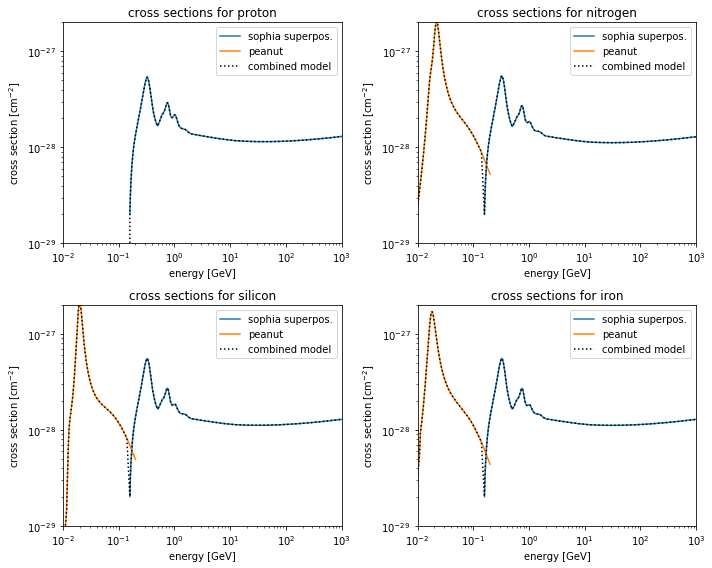

In [20]:
fig, ax = plt.subplots(2,2,figsize = (10,8))

eplot = np.logspace(-3,3,200)

plt.sca(ax[0,0])
plt.loglog(*cs_sophia.nonel_scale(101), label = 'sophia superpos.')
plt.loglog(*cs_talys.nonel_scale(101), label = 'peanut')
plt.loglog(*cs_combined.nonel_scale(101), label = 'combined model', c = 'black', linestyle= 'dotted')
plt.title('cross sections for proton')
plt.xlabel('energy [GeV]')
plt.ylabel('cross section [cm$^{-2}$]')
plt.xlim(1e-2,1e3)
plt.ylim(1e-29,2e-27)
plt.legend()

plt.sca(ax[0,1])
plt.loglog(*cs_sophia.nonel_scale(1407), label = 'sophia superpos.')
plt.loglog(*cs_talys.nonel_scale(1407), label = 'peanut')
plt.loglog(*cs_combined.nonel_scale(1407), label = 'combined model', c = 'black', linestyle= 'dotted')
plt.title('cross sections for nitrogen')
plt.xlabel('energy [GeV]')
plt.ylabel('cross section [cm$^{-2}$]')
plt.xlim(1e-2,1e3)
plt.ylim(1e-29,2e-27)
plt.legend()

plt.sca(ax[1,0])
plt.loglog(*cs_sophia.nonel_scale(2814), label = 'sophia superpos.')
plt.loglog(*cs_talys.nonel_scale(2814), label = 'peanut')
plt.loglog(*cs_combined.nonel_scale(2814), label = 'combined model', c = 'black', linestyle= 'dotted')
plt.title('cross sections for silicon')
plt.xlabel('energy [GeV]')
plt.ylabel('cross section [cm$^{-2}$]')
plt.xlim(1e-2,1e3)
plt.ylim(1e-29,2e-27)
plt.legend()

plt.sca(ax[1,1])
plt.loglog(*cs_sophia.nonel_scale(5626), label = 'sophia superpos.')
plt.loglog(*cs_talys.nonel_scale(5626), label = 'peanut')
plt.loglog(*cs_combined.nonel_scale(5626), label = 'combined model', c = 'black', linestyle= 'dotted')
plt.title('cross sections for iron')
plt.xlabel('energy [GeV]')
plt.ylabel('cross section [cm$^{-2}$]')
plt.xlim(1e-2,1e3)
plt.ylim(1e-29,2e-27)
plt.legend()

plt.tight_layout()

# inclusive cross sections

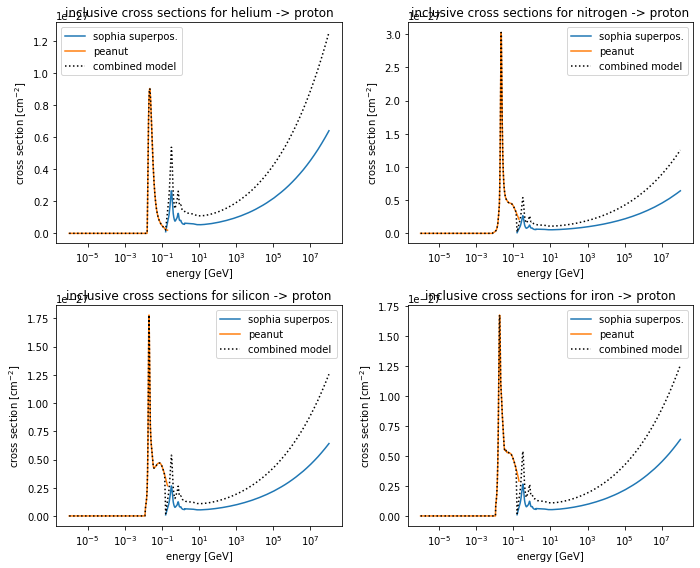

In [22]:
# print nonelastic and inclusive crosssections for oxygen (pid = 1608)
fig, ax = plt.subplots(2,2,figsize = (10,8))

eplot = np.logspace(-3,3,200)

plt.sca(ax[0,0])

plt.semilogx(*cs_sophia.incl_scale(402,101), label = 'sophia superpos.')
plt.semilogx(*cs_talys.incl_scale(402,101), label = 'peanut')
plt.semilogx(*cs_combined.incl_scale(402,101), c = 'black', label = 'combined model', linestyle= 'dotted')

plt.title('inclusive cross sections for helium -> proton')
plt.xlabel('energy [GeV]')
plt.ylabel('cross section [cm$^{-2}$]')
plt.legend()

plt.sca(ax[0,1])

plt.semilogx(*cs_sophia.incl_scale(1407,101), label = 'sophia superpos.')
plt.semilogx(*cs_talys.incl_scale(1407,101), label = 'peanut')
plt.semilogx(*cs_combined.incl_scale(1407,101), c = 'black', label = 'combined model', linestyle= 'dotted')

plt.title('inclusive cross sections for nitrogen -> proton')
plt.xlabel('energy [GeV]')
plt.ylabel('cross section [cm$^{-2}$]')
plt.legend()

plt.sca(ax[1,0])

plt.semilogx(*cs_sophia.incl_scale(2814,101), label = 'sophia superpos.')
plt.semilogx(*cs_talys.incl_scale(2814,101), label = 'peanut')
plt.semilogx(*cs_combined.incl_scale(2814,101), c = 'black', label = 'combined model', linestyle= 'dotted')

plt.title('inclusive cross sections for silicon -> proton')
plt.xlabel('energy [GeV]')
plt.ylabel('cross section [cm$^{-2}$]')
plt.legend()

plt.sca(ax[1,1])

plt.semilogx(*cs_sophia.incl_scale(5626,101), label = 'sophia superpos.')
plt.semilogx(*cs_talys.incl_scale(5626,101), label = 'peanut')
plt.semilogx(*cs_combined.incl_scale(5626,101), c = 'black', label = 'combined model', linestyle= 'dotted')

plt.title('inclusive cross sections for iron -> proton')
plt.xlabel('energy [GeV]')
plt.ylabel('cross section [cm$^{-2}$]')
plt.legend()

plt.tight_layout()